In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Projections in R^2
---


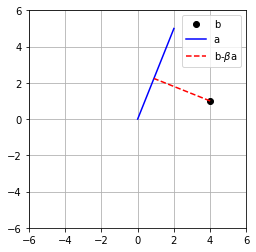

In [2]:
# point b
b = np.array([4, 1])

# line a
a = np.array([2, 5])

# beta
beta = (a.T@b) / (a.T@a)

# draw!
plt.plot(b[0], b[1], 'ko', label='b')
plt.plot([0, a[0]],[0, a[1]], 'b', label='a')

# now plot projection line
plt.plot([b[0], beta*a[0]],[b[1], beta*a[1]], 'r--', label=r'b-$\beta$a')
plt.axis('square')
plt.grid()
plt.legend()
plt.axis((-6, 6, -6, 6))

plt.show()


---
# VIDEO: Projections in R^N
---


In [3]:
## the goal here is to solve Ax=b for x

# sizes
m = 16
n = 10

# vector b
b = np.random.randn(m, 1)

# matrix A
A = np.random.randn(m, n)

# solution using explicit inverse
x1 = np.linalg.inv(A.T@A) @ (A.T@b)

# python solution (better method)
x2 = np.linalg.solve(A.T@A,A.T@b)

# show that the results are the same
print(np.round(x1.T, 3))
print(np.round(x2.T, 3))

[[ 0.727  0.093  0.261 -0.037  0.32  -0.399 -0.143 -0.101  0.509 -0.017]]
[[ 0.727  0.093  0.261 -0.037  0.32  -0.399 -0.143 -0.101  0.509 -0.017]]


In [4]:
## geometric perspective in R^3

# matrix sizes
m = 3
n = 2

# vector b
b = np.random.randn(m, 1)

# matrix A
A = np.random.randn(m, n)


# solution
x = np.linalg.solve(A.T@A, A.T@b)
Ax = A@x

print(b.T)
print(Ax.T)

[[-0.77979173 -1.02474683 -0.4752766 ]]
[[-0.97296355 -0.50598706  0.12431273]]


/home/yu/.pyenv/versions/3.6.11/envs/ml_env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/yu/.pyenv/versions/3.6.11/envs/ml_env/lib/python3.6/site-packages/numpy/lib/stride_tricks.py:116: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  array = np.array(array, copy=False, subok=subok)
/home/yu/.pyenv/versions/3.6.11/envs/ml_env/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested 

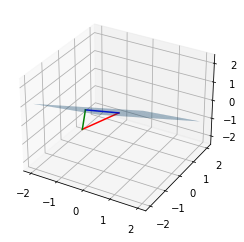

In [5]:
## plot
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.gca(projection='3d')

# plot the vectors
ax.plot([0, b[0]], [0, b[1]], [0, b[2]], 'r')
ax.plot([0, Ax[0]], [0, Ax[1]], [0, Ax[2]], 'b')

# plot the projection line
ax.plot([Ax[0][0], b[0]],
        [Ax[1][0], b[1]],
        [Ax[2][0], b[2]], 'g')

# now draw plane
xx, yy = np.meshgrid(np.linspace(-2,2), np.linspace(-2, 2))
cp = np.cross(A[:, 0], A[:, 1])
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx, yy, z1, alpha=.4)

plt.show()


---
# VIDEO: QR decomposition
---


In [6]:
# example from the slides

A = [[1, 0],
     [1, 0],
     [0, 1]]
  
# "full" QR decomposition
Q, R = np.linalg.qr(A, 'complete')
print(Q), print(' ')

# "economy" QR decomposition
Q,R = np.linalg.qr(A) # is the default option in Python
print(Q)

[[-0.70710678  0.          0.70710678]
 [-0.70710678  0.         -0.70710678]
 [-0.         -1.          0.        ]]
 
[[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [-0.         -1.        ]]


In [7]:
## another example

# the to-be-decomposed matrix
M = np.array([[1, 1, -2], [3, -1, 1]])

# QR decomposition
Q,R = np.linalg.qr(M, 'complete')

# notice:
print('R from QR: '), print(np.round(R, 4))
print('R from Q^TM: '), print(np.round(Q.T@M, 4))

R from QR: 
[[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]
R from Q^TM: 
[[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]


(None, None)

[]

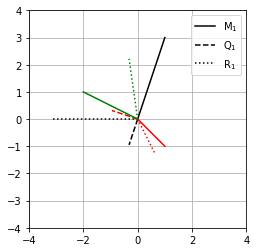

In [8]:
# plot
colorz = 'krg'

for i in range(0, np.shape(M)[1]):
    
    # plot original vector M
    plt.plot([0, M[0, i]], [0, M[1, i]], colorz[i])
    
    # plot orthogonalized vector Q
    if i<np.shape(Q)[1]:
        plt.plot([0, Q[0, i]], [0, Q[1, i]], colorz[i], linestyle='--')
    
    # plot residual vector R
    plt.plot([0, R[0, i]], [0, R[1, i]], colorz[i], linestyle=':')

    
plt.legend(['M$_1$', 'Q$_1$', 'R$_1$'])
plt.axis('square')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid(True)
plt.plot()